# MNIST on PE Network

In [455]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU
import NeuralNetwork as NN
import Layer
import importlib
import time
from copy import deepcopy
from IPython.display import display
from ipywidgets import FloatProgress

import mnist_loader
importlib.reload(mnist_loader)
importlib.reload(NN)
importlib.reload(Layer);

In [479]:
train, validate, test = mnist_loader.load_data_wrapper()
train = [torch.tensor(train[0][:]).float().to(device), torch.tensor(train[1][:]).float().to(device)]

In [481]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=784))
net.AddLayer(Layer.PELayer(n=60))
net.Connect(0,1)
net.AddLayer(Layer.PELayer(n=60))
net.Connect(1,2)
net.AddLayer(Layer.TopPELayer(n=10))
net.Connect(2,3)
net.layers[0].sigma = Layer.logistic
net.layers[0].sigma_p = Layer.logistic_p
net.layers[-1].sigma = Layer.softmax
net.layers[-1].sigma_p = Layer.softmax_p

## Train

In [482]:
epochs = 10
T = 3.
start_time = time.time()
batch_size = 100
net.learning_tau = torch.tensor(batch_size).float().to(device)
fp = FloatProgress(min=0,max=epochs*len(train[0]))  
display(fp)
for k in range(epochs):
    batches = NN.MakeBatches(train[0], train[1], batch_size=batch_size)
    for x in batches:
        net.Reset()
        net.Infer(T, x[0], x[1])
        fp.value += batch_size
end_time = time.time()
print('Total time: '+str(end_time-start_time))

Total time: 3495.813879966736


tensor([ 0.0947,  0.0942,  0.1004,  0.1030,  0.1089,  0.0980,  0.0866,
         0.1027,  0.0999,  0.1116], device='cuda:0')


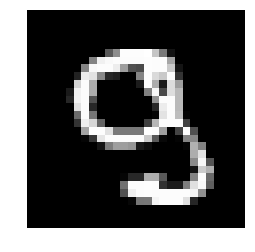

In [499]:
p = 151
plt.imshow(np.reshape(test[0][p],[28,28]), cmap='gray'); plt.axis('off');
net.Reset()
yy = net.Predict(10., test[0][p])
print(yy)

In [498]:
Layer.softmax(net.layers[-1].v)

tensor([ 0.0947,  0.0971,  0.1051,  0.0923,  0.1038,  0.0991,  0.1213,
         0.1001,  0.0905,  0.0961], device='cuda:0')

In [485]:
net.connections[0].W

tensor([[ 1.1044e-02,  1.1442e-02, -1.0694e-02,  ..., -7.5908e-03,
          3.6523e-04, -4.6336e-03],
        [-4.4577e-03,  1.5395e-03, -1.5616e-02,  ..., -1.1231e-02,
          1.3203e-02,  1.6506e-02],
        [ 6.5460e-03, -2.1832e-02, -3.0636e-02,  ..., -9.7490e-03,
          6.2065e-03,  7.3542e-03],
        ...,
        [-2.0314e-03, -4.4752e-03, -4.1064e-02,  ..., -1.2866e-02,
          3.0127e-02,  8.2123e-03],
        [-1.3681e-02, -4.8566e-03, -3.6709e-02,  ...,  4.8718e-03,
          7.1864e-03,  5.3041e-03],
        [-1.0434e-02,  5.3263e-04,  6.3203e-04,  ..., -4.8276e-03,
          1.4927e-02, -3.0006e-03]], device='cuda:0')

In [491]:
net.layers[1].b

tensor([ 1.2264e+00,  2.3967e-01,  6.6368e-01,  4.7407e+00, -2.2316e+00,
        -4.1589e-01,  1.3948e+00, -1.6682e+00, -3.5533e-01,  9.2875e-01,
        -2.2252e-01,  5.7656e-01, -4.2234e-01, -3.7023e-01,  1.0299e-01,
        -1.4691e+00,  3.7563e-01,  3.6563e-01, -7.6905e-01,  6.4041e-01,
        -3.8044e-01, -4.5194e-01,  3.6764e-01, -7.8366e+00, -1.2170e-01,
        -1.3916e-01, -6.0941e-01,  8.6214e-01,  4.3345e-01, -5.8247e+00,
         3.2828e-01, -1.1754e+00,  1.4234e+00,  1.0604e+02,  9.8726e-01,
         7.7674e-01, -3.9005e-01,  2.1992e+01,  2.0679e+00,  2.8695e-01,
        -2.2113e-01,  8.2913e-01, -1.7920e-01, -4.2177e-01,  2.3383e-01,
         8.3314e-01,  7.3812e-02, -8.1706e-01, -1.1207e+00, -9.3789e-01,
        -1.3744e+00,  2.0210e+00, -7.2168e-01, -3.7418e+00,  8.2874e-01,
        -8.1409e-03,  2.9072e-01,  1.2001e-01, -1.6222e+00,  9.4366e-02], device='cuda:0')

In [203]:
net.Save('mnist_net.npy')

In [204]:
net = NN.NeuralNetwork()
net.Load('mnist_net.npy')

In [353]:
net.Reset()
net.learning_tau = 20.
net.Infer(.2, test[0][p], test[1][p])

In [488]:
net.Reset()
gen = net.Generate(10., test[1][p])

In [492]:
gen

tensor([ 0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,
         0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,
         0.0425,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,
         0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,
         0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,
         0.0426,  0.0426,  0.0425,  0.0486,  0.0615,  0.0550,  0.0431,
         0.0426,  0.0422,  0.0425,  0.0425,  0.0423,  0.0422,  0.0418,
         0.0424,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0426,
         0.0426,  0.0426,  0.0426,  0.0426,  0.0424,  0.0426,  0.0430,
         0.0433,  0.0440,  0.0567,  0.0660,  0.0863,  0.0781,  0.0466,
         0.0528,  0.0387,  0.0475,  0.0548,  0.0538,  0.0482,  0.0427,
         0.0411,  0.0417,  0.0421,  0.0425,  0.0425,  0.0426,  0.0426,
         0.0426,  0.0426,  0.0426,  0.0426,  0.0426,  0.0424,  0.0423,
         0.0409,  0.0402,  0.0647,  0.0962,  0.1044,  0.0739,  0.0579,
      

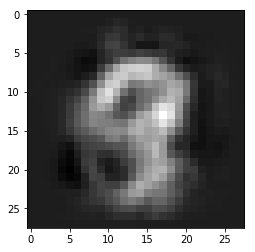

In [489]:
plt.imshow(np.reshape(gen,[28,28]), cmap='gray')

In [435]:
gen

tensor([ -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,
         -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,
         -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,
         -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,
         -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9808,
         -0.9808,  -0.9808,  -0.9809,  -0.9812,  -0.9808,  -0.9807,
         -0.9822,  -0.9819,  -0.9377,  -0.8843,  -0.9045,  -0.9403,
         -0.9617,  -0.9804,  -0.9813,  -0.9725,  -0.9677,  -0.9794,
         -0.9861,  -0.9823,  -0.9831,  -0.9809,  -0.9808,  -0.9808,
         -0.9808,  -0.9808,  -0.9808,  -0.9808,  -0.9806,  -0.9806,
         -0.9804,  -0.9801,  -0.9811,  -0.9789,  -0.9767,  -1.0476,
         -1.0159,  -0.9627,  -0.8847,  -0.9027,  -1.1788,  -1.2249,
         -1.1478,  -1.0927,  -1.1547,  -1.0588,  -1.0456,  -1.0512,
         -0.9999,  -0.9622,  -0.9686,  -0.9747,  -0.9808,  -0.9808,
         -0.9808,  -0.9808,  -0.9802,  -0.9801, 

In [436]:
train[0][0][:100]

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.], device='cuda:0')